In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import confusion_matrix
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay



In [ ]:
df = pd.read_csv('/content/Health_insurance.csv')

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'], uniques = pd.factorize(df['region'])
df_cleaned = df.dropna()

In [ ]:
df

In [ ]:
df.info()

In [ ]:
sns.relplot(x='region',
            y='charges',
            data=df);

In [ ]:
sns.relplot(x='age',
            y='charges',
            col='sex',
            data=df);

In [ ]:
sns.catplot(x='smoker',
            y='charges',
            data=df);

In [ ]:
sns.relplot(x='bmi',
            y='charges',

            data=df);

In [ ]:
df.describe()

In [ ]:
y=df['charges']
x=df.drop(['charges'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=21)

In [ ]:
dectree = DecisionTreeRegressor(max_depth=4)
dectree.fit(X_train,y_train)
dectree.score(X_test,y_test)

In [ ]:
plt.figure(figsize=((30,10)))
plot_tree(dectree,
          filled=True,
          feature_names=x.columns)
plt.show()

In [ ]:
y_pred=rfc.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred)
plt.plot([0, max(y_test)], [0, max(y_pred)])
plt.xlabel('Фактические значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)
plt.grid()
plt.show()

In [ ]:
rfc = RandomForestRegressor(n_estimators = 100, max_depth=4, random_state=42)
rfc.fit(X_train, y_train)
rfc.score (X_test, y_test)

0.8443556636871155

In [ ]:
rfc = RandomForestRegressor(n_estimators = 100, max_depth=3, random_state=42)
rfc.fit(X_train, y_train)
rfc.score (X_test, y_test)

In [ ]:
y_pred=rfc.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred)
plt.plot([0, max(y_test)], [0, max(y_pred)])
plt.xlabel('Фактические значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)
plt.grid()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_reg = xgb.XGBRegressor()

In [ ]:
xgb_reg.fit(X_train, y_train)

In [ ]:
feature_importances = xgb_reg.feature_importances_

names=df.columns.tolist()[:-1]

plt.figure(figsize=(10, 7))
plt.bar(names, feature_importances)
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.show()

In [ ]:
y_pred = xgb_reg.predict(X_test)

In [ ]:
xgb_reg.score(X_test, y_test)

In [ ]:
test_xgb_reg = xgb_reg.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid()
plt.show()



In [ ]:
вопросы для лаб
1. только табличные данные(фин риски , анализ надежности кредитоплатильщика)
2. регрессия  дерева, случайный лес, градиентный спуск
3. результаты:для задач классификации матрица ошибок,
для задач регрессии диаграмма рассеяния
4. диаграмма значимости признаков

In [ ]:
Лабораторная работа №3(классификация)
Напишите программу, обучающую модель машинного обучения решению задачи классификации текстов на естественном языке.
Датасеты  должны быть уникальны и на русском языке (или включать, в том числе, русский язык), их можно взять, например, с сайта: https://huggingface.co/datasets?task_categories=task_categories%3Atext-classification&language=language%3Aru&sort=trending. Допускается самостоятельное формирование датасета (например, для задачи классификации новостей или определения автора произведения).
В качестве классифицирующей модели можно взять любую из ранее изученных (логистическую регрессию, случайный лес, наивный байесовский классификатор  и т.п.)
В программе должно рассматриваться и сравниваться 3 подхода:
1. C использованием одной из готовых библиотек для классификации текстов (fasttext, catboost)
2-3.  С использованием разных подходов к векторизации текста (частотный/семантический)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.metrics import confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import gensim
from gensim.models import Word2Vec

!pip install catboost
from catboost import CatBoostClassifier
import gensim.downloader as api

from sklearn.feature_extraction.text import TfidfVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
data = pd.read_json('/content/healthcare_facilities_reviews.jsonl', encoding='utf-8', lines=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70597 entries, 0 to 70596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review_id   70597 non-null  int64 
 1   category    70597 non-null  object
 2   title       70597 non-null  object
 3   content     70597 non-null  object
 4   sentiment   70597 non-null  object
 5   source_url  70597 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.2+ MB


In [ ]:
data

,review_id,category,title,content,sentiment,source_url
0,0,Поликлиники стоматологические,Классный мастер,Огромное спасибо за чудесное удаление двух зуб...,positive,http://www.spr.ru/forum_vyvod.php?id_tema=2727539
1,1,Поликлиники стоматологические,Замечательный врач,Хочу выразить особую благодарность замечательн...,positive,http://www.spr.ru/forum_vyvod.php?id_tema=2302877
2,2,Поликлиники стоматологические,Благодарность работникам рентгена,Добрый вечер! Хотелось бы поблагодарить сотруд...,positive,http://www.spr.ru/forum_vyvod.php?id_tema=2815031
3,3,Поликлиники стоматологические,Доктор Рабинович,Женщины советского образца в регистратуре не и...,negative,http://www.spr.ru/forum_vyvod.php?id_tema=3443161
4,4,Поликлиники стоматологические,Есть кому сказать спасибо,У меня с детства очень плохие зубы (тонкая и х...,positive,http://www.spr.ru/forum_vyvod.php?id_tema=2592430
...,...,...,...,...,...,...
70592,70592,Водительские комиссии,Хуже районной поликлиники,Заведение ужасное. Врачи делят 1 кабинет на 2х...,negative,http://www.spr.ru/forum_vyvod.php?id_tema=273326
70593,70593,Водительские комиссии,Справки,"Люди, не обращайтесь в эту фирму! Муж проходил...",negative,http://www.spr.ru/forum_vyvod.php?id_tema=3401583
70594,70594,Водительские комиссии,Мед-Альфа - это наше будущее,"Дорогие посетители медицинского центра ООО ""Ме...",positive,http://www.spr.ru/forum_vyvod.php?id_tema=326078
70595,70595,Водительские комиссии,Хамское поведение,"В регистратуре сидит хамка, такое отношение и ...",negative,http://www.spr.ru/forum_vyvod.php?id_tema=3171911


In [ ]:
y=data['sentiment']
x=data['content']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train.shape

(56477, 164503)

In [ ]:
list(vectorizer.vocabulary_.items())[:10]

[('сегодня', 130528),
 ('около', 86654),
 ('часов', 158071),
 ('ждали', 39034),
 ('приема', 112087),
 ('кабинета', 51012),
 ('ортопеда', 88834),
 ('гурко', 30858),
 ('специалист', 137853),
 ('она', 87198)]

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9146600566572238
Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.92      0.90      5778
    positive       0.94      0.91      0.93      8342

    accuracy                           0.91     14120
   macro avg       0.91      0.92      0.91     14120
weighted avg       0.92      0.91      0.91     14120



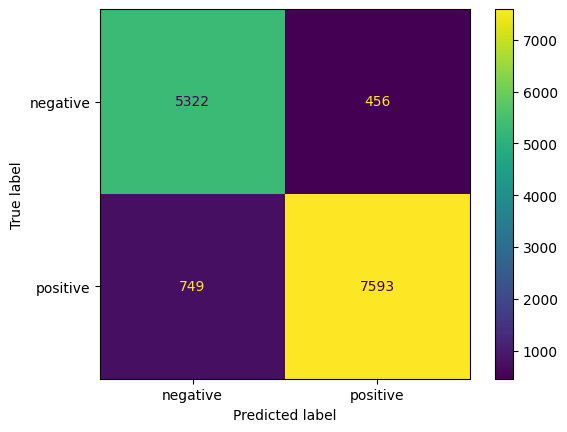

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
cm_display.plot()

TFIDF

In [ ]:
y=data['sentiment']
x=data['content']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9154390934844192
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.91      0.90      5778
    positive       0.93      0.92      0.93      8342

    accuracy                           0.92     14120
   macro avg       0.91      0.91      0.91     14120
weighted avg       0.92      0.92      0.92     14120



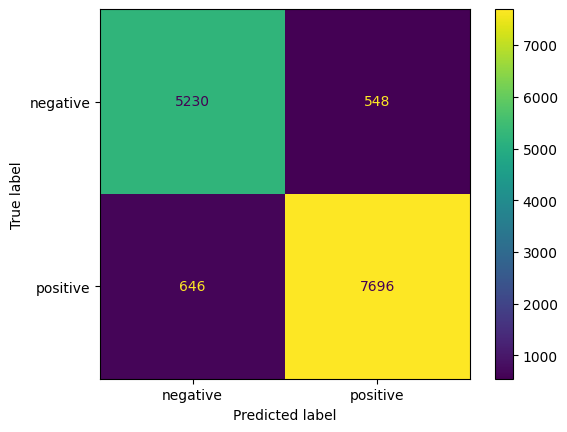

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
cm_display.plot()

Word2Vec

In [ ]:
y=data['sentiment']
x=data['content']

In [ ]:
def transfom(x_t):
  array=[]
  for elem in x_t:
    words = elem.split()
    array.append(words)
  return array
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model = Word2Vec(transfom(x), vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
def vec(text):
  words=text.split()
  words_vec=[model.wv[word] for word in words if word in model.wv]

  if len(words_vec)==0:
    return np.zeros(100)
  words_vec=np.array(words_vec)
  return words_vec.mean(axis=0)

X_train=np.array([vec(text) for text in X_train])
X_test=np.array([vec(text) for text in X_test])

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8873937677053825
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.88      0.87      5778
    positive       0.92      0.89      0.90      8342

    accuracy                           0.89     14120
   macro avg       0.88      0.89      0.88     14120
weighted avg       0.89      0.89      0.89     14120



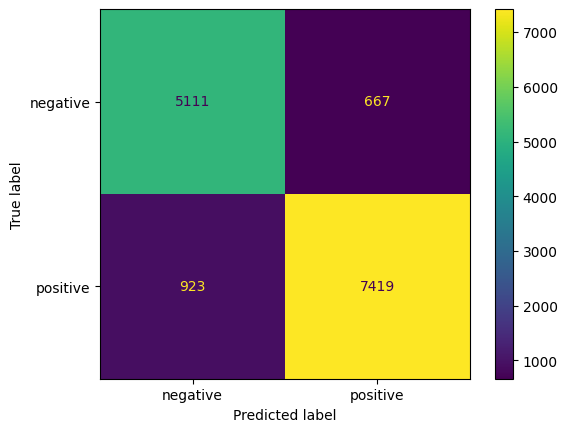

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
cm_display.plot()

catboost

In [ ]:
y=data['sentiment']
x=data[['content']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, text_features=['content'])
model.fit(X_train, y_train)


0:	learn: 0.6225527	total: 414ms	remaining: 41s
1:	learn: 0.5650205	total: 768ms	remaining: 37.6s
2:	learn: 0.5162140	total: 1.13s	remaining: 36.5s
3:	learn: 0.4759200	total: 1.49s	remaining: 35.7s
4:	learn: 0.4417503	total: 1.83s	remaining: 34.8s
5:	learn: 0.4120823	total: 2.19s	remaining: 34.4s
6:	learn: 0.3856224	total: 2.56s	remaining: 34s
7:	learn: 0.3636577	total: 2.9s	remaining: 33.4s
8:	learn: 0.3442673	total: 3.27s	remaining: 33.1s
9:	learn: 0.3275748	total: 3.61s	remaining: 32.5s
10:	learn: 0.3127725	total: 3.97s	remaining: 32.1s
11:	learn: 0.2990070	total: 4.36s	remaining: 32s
12:	learn: 0.2875256	total: 4.71s	remaining: 31.5s
13:	learn: 0.2771641	total: 5.06s	remaining: 31.1s
14:	learn: 0.2675619	total: 5.45s	remaining: 30.9s
15:	learn: 0.2593634	total: 5.8s	remaining: 30.5s
16:	learn: 0.2522054	total: 6.14s	remaining: 30s
17:	learn: 0.2462409	total: 6.51s	remaining: 29.7s
18:	learn: 0.2406753	total: 6.88s	remaining: 29.3s
19:	learn: 0.2354951	total: 7.23s	remaining: 28.9s


In [ ]:
y_pred_catboost = model.predict(X_test)
print("CatBoost:")
print(classification_report(y_test, y_pred_catboost))

CatBoost:
              precision    recall  f1-score   support

    negative       0.90      0.95      0.92      5778
    positive       0.96      0.93      0.94      8342

    accuracy                           0.94     14120
   macro avg       0.93      0.94      0.93     14120
weighted avg       0.94      0.94      0.94     14120



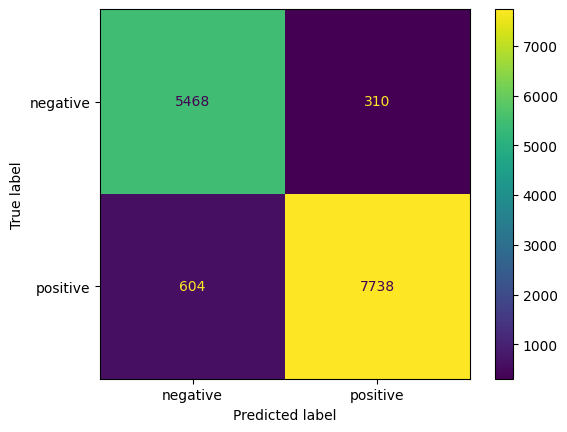

In [ ]:
cm = confusion_matrix(y_test, y_pred_catboost)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot()

лаб 3 генерация текста

In [ ]:
#!pip install transformers==4.24.0

from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
import pandas as pd

DEVICE = torch.device("cuda:2")
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments



In [ ]:
model_name_or_path = "sberbank-ai/rugpt3large_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name_or_path)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/622 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.14G [00:00<?, ?B/s]

In [ ]:
df=pd.read_csv('/content/data_file.csv')
df = df.iloc[1:20]
df.to_csv('output_file.csv', index=False)

In [ ]:
df

,Text,Ind
1,"Проказница-Мартышка,\nОсёл,\nКозёл,\nДа косола...",1
2,"Уж сколько раз твердили миру,\nЧто лесть гнусн...",2
3,"Собака, Лев да Волк с Лисой\nВ соседстве как-т...",3
4,У кухни под окном\nНа солнышке Полкан с Барбос...,4
5,"В глуши расцветший Василек\nВдруг захирел, зав...",5
6,"Мужик на лето в огород\nНаняв Осла, приставил\...",6
7,"«Соседка, слышала ль ты добрую молву?»\nВбежав...",7
8,"«Приятель дорогой, здорово! Где ты был?» —\n«В...",8
9,К Крестьянину на двор\nЗалез осенней ночью вор...,9
10,"«Сенюша, знаешь ли, покамест, как баранов,\nОп...",10


In [ ]:



train_path ='/content/output_file.csv'

'''with open(train_path, "w") as f:
    f.write(text1)'''


train_dataset = TextDataset(tokenizer=tokenizer,file_path=train_path,block_size=32)


data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
training_args = TrainingArguments(output_dir="./finetuned", #The output directory
    overwrite_output_dir='experiments', #overwrite the content of the output directory
    num_train_epochs=5, # number of training epochs
    per_device_train_batch_size=1, # batch size for training
    per_device_eval_batch_size=1,  # batch size for evaluation
    warmup_steps=1,# number of warmup steps for learning rate scheduler
    gradient_accumulation_steps=1, # to make "virtual" batch size larger)
)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    optimizers = (torch.optim.AdamW(model.parameters(),lr=1e-5),None) # Optimizer and lr scheduler
)

In [ ]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=455, training_loss=0.9862228896591689, metrics={'train_runtime': 518.1743, 'train_samples_per_second': 0.878, 'train_steps_per_second': 0.878, 'total_flos': 59401266462720.0, 'train_loss': 0.9862228896591689, 'epoch': 5.0})

In [ ]:
tokenizer.save_pretrained('/path/to/save/tokenizer')

('/path/to/save/tokenizer/tokenizer_config.json',
 '/path/to/save/tokenizer/special_tokens_map.json',
 '/path/to/save/tokenizer/vocab.json',
 '/path/to/save/tokenizer/merges.txt',
 '/path/to/save/tokenizer/added_tokens.json')

In [ ]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)
with open('model.pkl', 'wb') as f:
    model=pickle.load(f)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1536)
    (wpe): Embedding(2048, 1536)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=4608, nx=1536)
          (c_proj): Conv1D(nf=1536, nx=1536)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=6144, nx=1536)
          (c_proj): Conv1D(nf=1536, nx=6144)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1536, out_features=50257, bias=False)
)

In [ ]:
text = "Как же хочеться спать"
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)  # Move input_ids to the same device

# Set the model to evaluation mode
model.eval()

# Generate text
with torch.no_grad():
    out = model.generate(input_ids,
                         do_sample=True,
                         num_beams=2,
                         temperature=1.5,
                         top_p=0.9,
                         max_length=60)

# Decode the generated text
generated_text = tokenizer.decode(out[0], skip_special_tokens=True)
print()
print(generated_text)


Как же хочеться спать.
И я усну, лишь только ночь настанет,
И солнышко взойдет, и ветерок
Меня прохладой оботрет.
Я с радости проснусь, расправлю
Ноги, руки, хвостик свой пушистый,
И — будь что


In [ ]:
text = "Как же хочеться есть"
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)  # Move input_ids to the same device

# Set the model to evaluation mode
model.eval()

# Generate text
with torch.no_grad():
    out = model.generate(input_ids,
                         do_sample=True,
                         num_beams=2,
                         temperature=1.5,
                         top_p=0.9,
                         max_length=75)

# Decode the generated text
generated_text = tokenizer.decode(out[0], skip_special_tokens=True)
print()
print(generated_text)


Как же хочеться есть,
Когда вокруг так красиво!
И солнышко греет, и птички поют,
И солнышко всех веселей!
Ну, а я сижу одна,
И грущу, и слёзы лью,
И солнце мне совсем не греет,
И птички петь не хотят!
Вот солнышко выглянуло,
Драго


In [ ]:
text = "Увидела оса слона"
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)  # Move input_ids to the same device

# Set the model to evaluation mode
model.eval()

# Generate text
with torch.no_grad():
    out = model.generate(input_ids,
                         do_sample=True,
                         num_beams=2,
                         temperature=1.5,
                         top_p=0.9,
                         max_length=150)

# Decode the generated text
generated_text = tokenizer.decode(out[0], skip_special_tokens=True)
print()
print(generated_text)


Увидела оса слона
И думает: «Ах, какой он большой!
Какие у него рога!
Какие бусы на шее!
И как он ловко ступает!»
Пришла к ней как-то раз свинья
И говорит: — Послушай-ка,
Какие есть у меня богатства!
Вот, например, оселок да серп!
Вот тебе, бабушка, морковка!
Вот тебе, дедушка, репка!
Вот тебе, братец Иванушка!
Вот тебе, сестрица Аленушка!
Вот тебе, молодецки свистулька!
Вот тебе, молодецки колечко!
Вот тебе, молодецки лапти!
Вот тебе, молодецки саночки
